In [58]:
#import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
#read the data set
data = pd.read_csv("C:\Datasets\creditcard.csv")

In [4]:
#taking sample from population if need
data = data.sample(30000)

In [8]:
#no of rows and columns
print("Total rows and columns\n\n", data.shape,"\n")

Total rows and columns

 (30000, 31) 



In [41]:
#peek at data
data.sample(30000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257033,157973.0,2.035363,-0.943719,-1.654324,-1.123605,-0.369078,-0.896880,-0.085331,-0.306179,-0.967567,...,-0.473532,-1.074797,0.253068,-0.455122,-0.480171,1.025928,-0.137747,-0.070883,93.00,0
253606,156328.0,-2.681484,2.947090,-2.240173,-1.455204,0.142908,-1.965910,1.041989,0.298122,1.277766,...,-0.015013,0.688897,0.007595,-0.024001,0.149087,0.115670,0.923783,0.503188,0.70,0
189902,128605.0,2.093777,-1.622235,-1.022351,-1.382866,-1.420962,-1.021988,-0.809620,-0.362082,-1.303002,...,-0.102104,0.009811,0.121235,-0.024676,-0.186828,-0.172023,-0.009214,-0.032082,124.19,0
63064,50539.0,-0.737680,-0.868295,1.165387,-3.543040,-0.792303,-0.027805,0.179904,0.128941,0.351717,...,-0.249427,-0.380746,-0.143487,-0.891484,0.679306,-0.645775,0.082862,0.066366,137.97,0
180684,124655.0,1.994755,-0.424426,-0.302405,0.179600,-0.827689,-0.757286,-0.557750,-0.027265,1.457219,...,-0.199068,-0.451715,0.407683,-0.062726,-0.544971,-0.277805,0.007448,-0.038760,4.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75166,55934.0,1.090388,-0.044245,0.627984,1.343311,-0.375617,0.298958,-0.307250,0.265774,0.417079,...,0.011308,0.215968,-0.098872,0.010226,0.596862,-0.256159,0.042296,0.007362,14.95,0
39474,39852.0,-3.276977,-3.358101,1.280505,-1.382828,1.830592,-0.594572,-1.246716,0.425295,-0.865578,...,0.404260,0.609398,0.126074,-1.257736,0.755074,-0.084151,-0.028923,0.646722,218.00,0
273934,165772.0,-1.564709,0.879478,-0.475141,-0.550711,0.096614,-1.131379,0.275612,0.498064,-0.039115,...,-0.294766,-0.430809,0.598646,0.055520,-0.370373,0.103808,-0.167390,-0.299002,8.99,0
99073,66950.0,-1.022110,0.433530,2.671630,2.719255,0.221537,0.620921,0.203289,0.137167,-1.336334,...,0.112708,0.266735,0.044656,0.006455,0.049542,0.196266,0.139922,-0.054269,103.81,0


In [43]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
data.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,30000.000,30000.000
mean,94755.017,88.708
std,47545.095,238.805
min,35.000,0.000
25%,53887.500,5.850
50%,84909.500,22.720
75%,139086.500,77.360
max,172768.000,7879.420


In [9]:
#Dependent and independent variable
X = data.iloc[:, 1:30].columns

y = data['Class']

X = data[X]

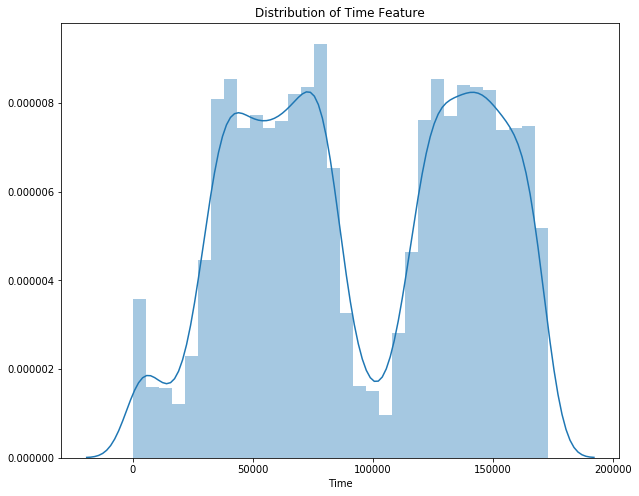

In [45]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(data.Time)

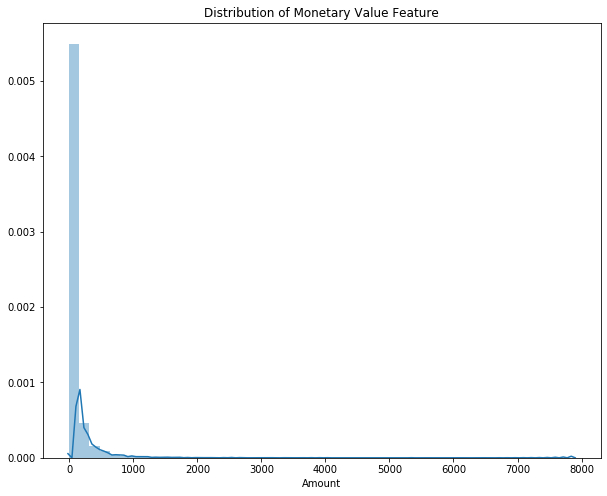

In [46]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(data.Amount)

In [49]:
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 29949 non-fraudulent transactions (99.830%) and 51 fraudulent transactions (0.170%).


In [10]:
#total count in each class
count = data['Class'].value_counts()
print("Total count in each class\n\n",count)
print("\n")

Total count in each class

 0    29947
1       53
Name: Class, dtype: int64




Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

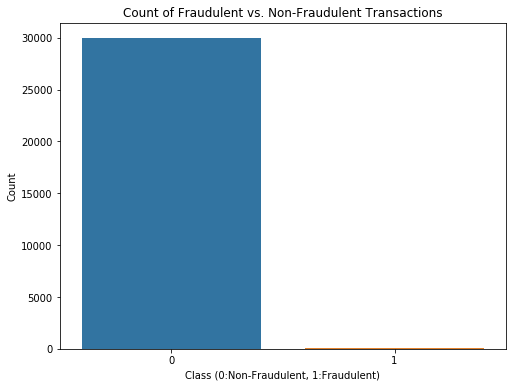

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [51]:
corr = data.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,1.121e-01,-1.668e-02,-4.279e-01,-0.107,0.180,-7.021e-02,8.872e-02,-4.094e-02,-7.843e-03,...,4.635e-02,1.451e-01,5.641e-02,-9.677e-03,-0.230,-4.363e-02,-3.784e-03,-1.271e-02,-1.163e-02,-0.008
V1,0.112,1.000e+00,-1.374e-03,-2.786e-03,-0.003,-0.018,1.959e-02,4.160e-02,2.633e-02,-9.618e-03,...,1.817e-02,-9.619e-03,-4.482e-02,-2.654e-03,-0.023,-9.455e-03,3.979e-03,2.089e-02,-2.132e-01,-0.102
V2,-0.017,-1.374e-03,1.000e+00,-4.816e-03,-0.001,-0.041,3.566e-02,2.602e-02,-2.155e-02,7.503e-03,...,-2.239e-02,-5.617e-03,-7.452e-02,-4.129e-03,-0.025,-7.357e-03,-3.128e-02,-2.040e-02,-5.207e-01,0.091
V3,-0.428,-2.786e-03,-4.816e-03,1.000e+00,0.012,-0.014,1.551e-02,2.087e-02,3.047e-02,-8.444e-03,...,1.928e-02,-6.855e-03,-1.367e-02,-1.422e-03,-0.005,1.081e-02,1.803e-02,1.009e-02,-2.022e-01,-0.193
V4,-0.107,-2.520e-03,-1.255e-03,1.202e-02,1.000,0.021,-6.599e-03,-2.456e-02,-1.263e-03,-9.598e-03,...,-8.613e-03,1.316e-02,1.418e-02,1.033e-02,0.003,9.661e-03,-1.870e-02,3.732e-03,8.672e-02,0.140
V5,0.180,-1.819e-02,-4.092e-02,-1.364e-02,0.021,1.000,-1.325e-02,2.491e-02,7.065e-03,9.899e-03,...,1.949e-02,3.794e-03,-1.708e-02,5.875e-03,-0.004,9.874e-03,5.496e-02,-1.314e-02,-3.591e-01,-0.079
V6,-0.070,1.959e-02,3.566e-02,1.551e-02,-0.007,-0.013,1.000e+00,-2.052e-02,-1.188e-02,2.364e-03,...,-4.640e-03,7.399e-04,1.669e-02,-1.675e-02,0.002,-2.794e-03,-2.344e-02,1.626e-02,1.884e-01,-0.052
V7,0.089,4.160e-02,2.602e-02,2.087e-02,-0.025,0.025,-2.052e-02,1.000e+00,5.627e-02,3.006e-03,...,6.848e-02,-2.125e-02,6.886e-02,-1.107e-02,0.024,9.803e-04,-2.064e-02,3.218e-02,3.589e-01,-0.198
V8,-0.041,2.633e-02,-2.155e-02,3.047e-02,-0.001,0.007,-1.188e-02,5.627e-02,1.000e+00,8.221e-03,...,6.386e-02,-2.002e-02,-1.329e-02,5.610e-03,-0.007,-5.068e-03,-1.980e-02,1.487e-02,-1.003e-01,0.012
V9,-0.008,-9.618e-03,7.503e-03,-8.444e-03,-0.010,0.010,2.364e-03,3.006e-03,8.221e-03,1.000e+00,...,2.976e-02,-6.431e-03,1.699e-02,-7.545e-03,0.020,2.245e-03,2.497e-02,-1.289e-02,-4.675e-02,-0.096


Text(0.5, 1, 'Heatmap of Correlation')

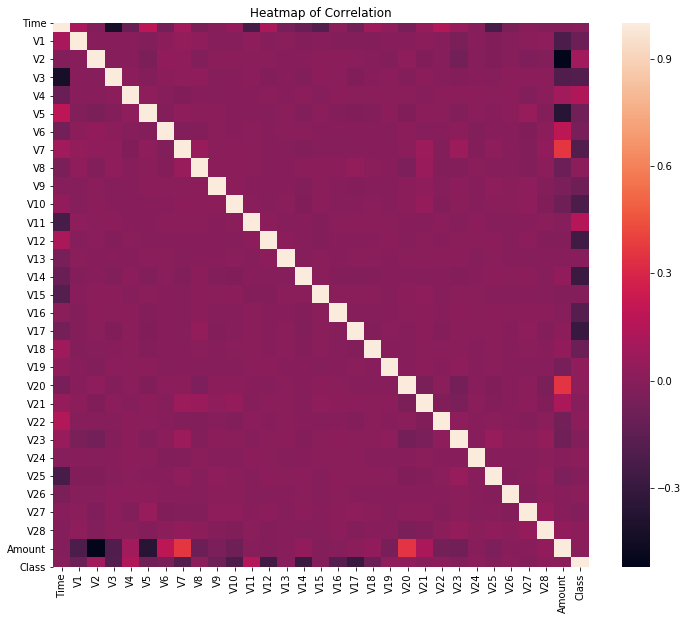

In [52]:
#heatmap
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [53]:
#skewness
skew_ = data.skew()
skew_

Time      -0.039
V1        -3.143
V2        -4.163
V3        -1.876
V4         0.624
V5         0.019
V6         1.139
V7        -1.993
V8       -13.247
V9         0.564
V10        1.020
V11        0.287
V12       -2.225
V13        0.045
V14       -1.534
V15       -0.316
V16       -1.023
V17       -3.103
V18       -0.197
V19        0.105
V20       -2.797
V21       -0.704
V22       -0.073
V23       -6.339
V24       -0.550
V25       -0.218
V26        0.587
V27       -2.149
V28       13.005
Amount    10.103
Class     24.193
dtype: float64

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(data[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

#scaling the amount column
scaled_amount = scaler2.fit_transform(data[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [56]:
#concatenating newly created columns w original df
data = pd.concat([data, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
8960,12353.0,1.160,-0.175,0.652,0.236,-0.454,0.090,-0.452,0.065,1.786,...,-0.040,0.074,0.318,1.084,-0.082,-0.018,15.99,0.0,-0.368,1.049
6271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.235,-0.414
4497,3803.0,1.223,0.319,0.302,0.718,-0.162,-0.528,-0.164,-0.069,1.211,...,0.091,-0.127,0.175,0.061,-0.061,0.010,9.99,0.0,-0.362,-0.188
28005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320,-1.086
1644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.367,1.118


In [60]:
#dropping old amount and time columns
data.drop(['Amount', 'Time'], axis=1, inplace=True)

KeyError: "['Amount' 'Time'] not found in axis"

In [11]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Build the model
clf = LogisticRegression()

In [13]:
# Train the classifier
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#test the model
y_pred = clf.predict(X_test)

In [15]:
#classification report
cr = (classification_report(y_test, y_pred))

In [16]:
#confusion matrix
cm = (metrics.confusion_matrix(y_test, y_pred))
print("Confusion Matrix:\n\n",cm,"\n")

Confusion Matrix:

 [[5991    0]
 [   5    4]] 



In [17]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5991
           1       1.00      0.44      0.62         9

    accuracy                           1.00      6000
   macro avg       1.00      0.72      0.81      6000
weighted avg       1.00      1.00      1.00      6000



In [18]:
#Accuracy score
a= (metrics.accuracy_score(y_test, y_pred))
print("Accuracy score:",round(a,1))

Accuracy score: 1.0


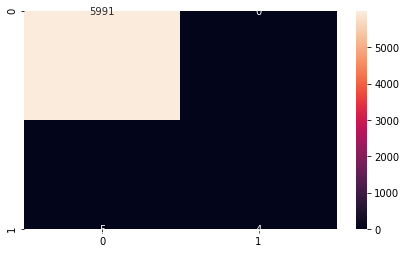

In [19]:
#heat map for confusion matrix
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [20]:
#print the actual and predicted labels
df1 = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
print(df1.head(25))

        Actual  Predicted
256553       0          0
173285       0          0
192331       0          0
129138       0          0
74926        0          0
241729       0          0
120478       0          0
190358       0          0
42412        0          0
146033       0          0
246976       0          0
211430       0          0
201277       0          0
251737       0          0
205140       0          0
220204       0          0
218099       0          0
120465       0          0
7677         0          0
75791        0          0
60270        0          0
225409       0          0
146964       0          0
239327       0          0
152893       0          0
